In [ ]:
import rosbag

In [352]:
bags_base_dir = 'data/20230818_Bahnhofstrasse_Dodo/mission_data/dodo_mission_2023_08_19/2023-08-19-19-40-19/'
bag_path_npc = bags_base_dir + '2023-08-19-19-40-19_anymal-d020-npc_0.bag'

bag = rosbag.Bag(bag_path_npc)
bag


In [353]:
print(f"start time: {bag.get_start_time()}")
print(f"end time: {bag.get_end_time()}")
print(f"messages: {bag.get_message_count()}")

start time: 1692466820.30904
end time: 1692467120.2907732
messages: 65983


In [354]:
# list topics
topics = [topic for topic in bag.get_type_and_topic_info().topics]
for topic in sorted(topics):
    print(topic)

/behavior_engine/status
/depth_camera_left/depth/camera_info
/depth_camera_left/depth/image_rect_raw
/depth_camera_left/point_cloud_self_filtered
/depth_camera_right/depth/camera_info
/depth_camera_right/depth/image_rect_raw
/depth_camera_right/point_cloud_self_filtered
/lidar/packets
/point_cloud_filter/lidar/point_cloud_filtered
/wide_angle_camera_front/camera_info
/wide_angle_camera_front/image_color_rect/compressed
/wide_angle_camera_rear/camera_info
/wide_angle_camera_rear/image_color_rect/compressed


In [366]:
from rospy import rostime

mission_percent = 0.7

time = bag.get_start_time() + (bag.get_end_time() - bag.get_start_time()) * mission_percent
time = rostime.Time.from_sec(time)

print(f"mission time: {time}")
msgs = bag.read_messages(topics=['/wide_angle_camera_rear/image_color_rect/compressed'], start_time=time)
msgs

mission time: 1692467030296253204


<generator object _BagReader200.read_messages at 0x7e7a5b7ebb50>

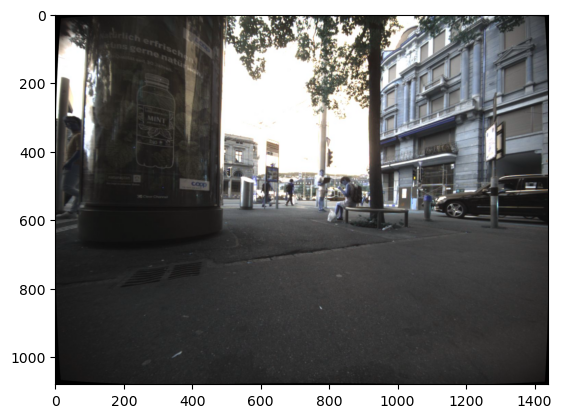

In [372]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

topic, msg, t = next(msgs)


def get_rgb_image(_msg):
    np_arr = np.frombuffer(_msg.data, np.uint8)
    return cv2.imdecode(np_arr, cv2.IMREAD_COLOR)


img = get_rgb_image(msg)
plt.imshow(img)

In [402]:

msgs_depth = bag.read_messages(topics=['/depth_camera_left/depth/image_rect_raw'], start_time=t)




480 848 16UC1 0 1696
(480, 848)


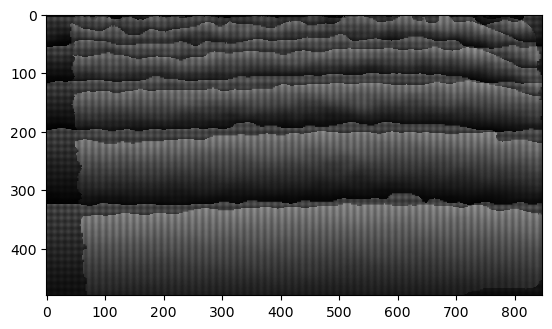

In [403]:

from cv_bridge import CvBridge

_, msg, _ = next(msgs_depth)

print(msg.height, msg.width, msg.encoding, msg.is_bigendian, msg.step)

bridge = CvBridge()
cv_image = bridge.imgmsg_to_cv2(msg, desired_encoding="passthrough")
print(cv_image.shape)  # (480, 640)

image = np.array(cv_image, dtype=np.float32)
plt.imshow(image, cmap='gray')


